
# Visual Automata

Copyright 2021 Lewi Lie Uberg\
_Released under the MIT license_

Visual Automata is a Python 3 library built as a wrapper for **Caleb Evans'** [Automata](https://github.com/caleb531/automata) library to add more visualization features.

## Prerequisites

[Automata](https://github.com/caleb531/automata)\
`pip install automata-lib`\
`pip install pandas`\
`pip install graphviz`\
`pip install colormath`\
`pip install jupyterlab`

## Installing

`pip install visual-automata`

## Contents

- [Visual Automata](#visual-automata)
  - [Prerequisites](#prerequisites)
  - [Installing](#installing)
  - [Contents](#contents)
    - [VisualDFA](#visualdfa)
      - [Importing](#importing)
      - [Instantiating DFAs](#instantiating-dfas)
      - [Converting](#converting)
      - [Minimal-DFA](#minimal-dfa)
      - [Transition Table](#transition-table)
      - [Check input strings](#check-input-strings)
      - [Show Diagram](#show-diagram)
  - [Authors](#authors)
  - [License](#license)
  - [Acknowledgments](#acknowledgments)

### VisualDFA

#### Importing

Import needed classes.

In [1]:
from automata.fa.dfa import DFA

from visual_automata.fa.dfa import VisualDFA

#### Instantiating DFAs

Define an automata-lib DFA that can accept any string ending with 00 or 11.

In [2]:
dfa = VisualDFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)

#### Converting

An automata-lib DFA can be converted to a VisualDFA.

Define an automata-lib DFA that can accept any string ending with 00 or 11.

In [3]:
dfa = DFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)

Convert automata-lib DFA to VisualDFA.

In [4]:
dfa = VisualDFA(dfa)

#### Minimal-DFA

Creates a minimal DFA which accepts the same inputs as the old one. Unreachable states are removed and equivalent states are merged. States are renamed by default.

In [5]:
new_dfa = VisualDFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'0': 'q0', '1': 'q2'},
        'q2': {'0': 'q2', '1': 'q1'}
    },
    initial_state='q0',
    final_states={'q1'}
)

In [6]:
new_dfa.table

,0,1
→q0,q0,*q1
*q1,q0,q2
q2,q2,*q1


```text
      0    1
→q0  q0  *q1
*q1  q0   q2
q2   q2  *q1
```

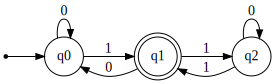

In [7]:
new_dfa.show_diagram()

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/new_dfa.png?raw=true "new_dfa")

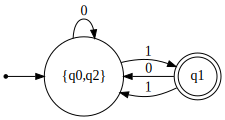

In [8]:
minimal_dfa = VisualDFA.minify(new_dfa)
minimal_dfa.show_diagram()

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/minimal_dfa.png?raw=true "minimal_dfa")

In [9]:
minimal_dfa.table

,0,1
"→{q0,q2}","{q0,q2}",*q1
*q1,"{q0,q2}","{q0,q2}"


```text
                0        1
→{q0,q2}  {q0,q2}      *q1
*q1       {q0,q2}  {q0,q2}
```

#### Transition Table

Outputs the transition table for the given DFA.

In [10]:
dfa.table

,0,1
→q0,q3,q1
q1,q3,*q2
*q2,q3,*q2
q3,*q4,q1
*q4,*q4,q1


```text
       0    1
→q0   q3   q1
q1    q3  *q2
*q2   q3  *q2
q3   *q4   q1
*q4  *q4   q1
```

#### Check input strings

`1001` does not end with `00` or `11`, and is therefore `Rejected`

In [11]:
dfa.input_check("1001")

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1

```text
          [Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
```

`10011` does end with `11`, and is therefore `Accepted`

In [12]:
dfa.input_check("10011")

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
5                 q1             1        *q2

```text
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
5                 q1             1        *q2
```

#### Show Diagram

For IPython `dfa.show_diagram()` may be used.\
For a python script `dfa.show_diagram(view=True)` may be used to automatically view the graph as a PDF file.

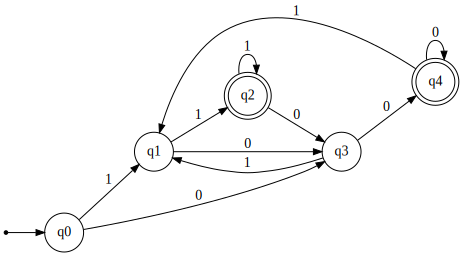

In [13]:
dfa.show_diagram()

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/dfa.png?raw=true "dfa")

The `show_diagram` method also accepts input strings, and will return a graph with gradient `red` arrows for `Rejected` results, and gradient `green` arrows for `Accepted` results. It will also display a table with transitions states stepwise. The steps in this table will correspond with the `[number]` over each traversed arrow.

Please note that for visual purposes additional arrows are added if a transition is traversed more than once.

[Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1

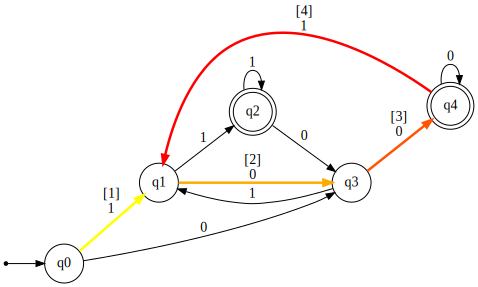

In [14]:
dfa.show_diagram("1001")

```text
          [Rejected]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
```

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/dfa_1001.png?raw=true "dfa_1001")

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
5                 q1             1        *q2

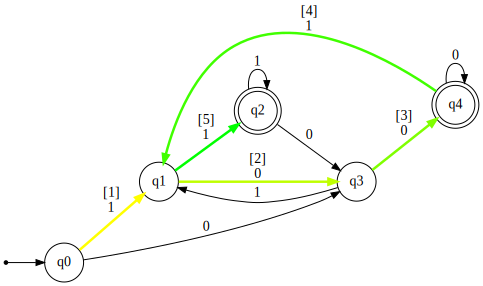

In [15]:
dfa.show_diagram("10011")

```text
          [Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             1         q1
2                 q1             0         q3
3                 q3             0        *q4
4                *q4             1         q1
5                 q1             1        *q2
```

![alt text](https://github.com/lewiuberg/visual-automata/blob/master/images/dfa_10011.png?raw=true "dfa_10011")

## Authors

- **[Lewi Lie Uberg](https://github.com/lewiuberg)** - [uberg.me](https://uberg.me/)

## License

This project is licensed under the MIT License - see the [LICENSE.md](https://github.com/lewiuberg/visual-automata/blob/master/LICENSE.txt) file for details

## Acknowledgments

- [Caleb Evans](https://github.com/caleb531) for his work on automata-lib.
- [Geir Arne Hjelle](https://github.com/gahjelle), [Michal Porteš](https://github.com/mportesdev), and [Bart Willems](https://github.com/bart-r-willems) for their general counsel.
- [JFLAP](http://www.jflap.org) for their work on a GUI based Automata application.